In [18]:
import pymc as pm
import arviz as az 
import scipy.stats as st 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = r"C:/Users/justi/Documents/GitHub/stoc_hs24/unterlagen MEP/1 - Bayes Statistik/data/chemical_shifts.csv"
df = pd.read_csv(path).iloc[:, 0]
df.head()

0    55.12
1    53.73
2    50.24
3    52.05
4    56.40
Name: 51.06, dtype: float64

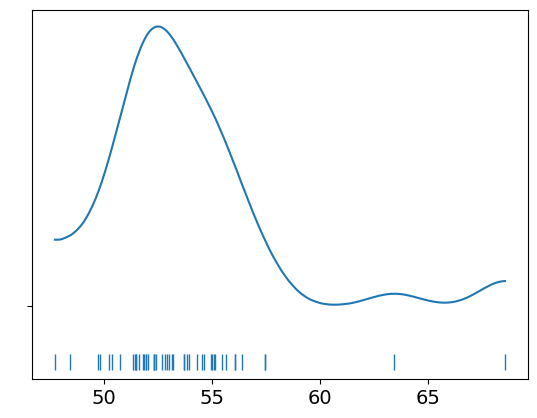

In [19]:
az.plot_kde(df, rug=True) 
plt.yticks([0], alpha=0)
plt.show()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,53.545,0.534,52.545,54.541,0.009,0.006,3950.0,2885.0,1.01
sigma,3.574,0.386,2.897,4.308,0.007,0.005,3694.0,2379.0,1.00


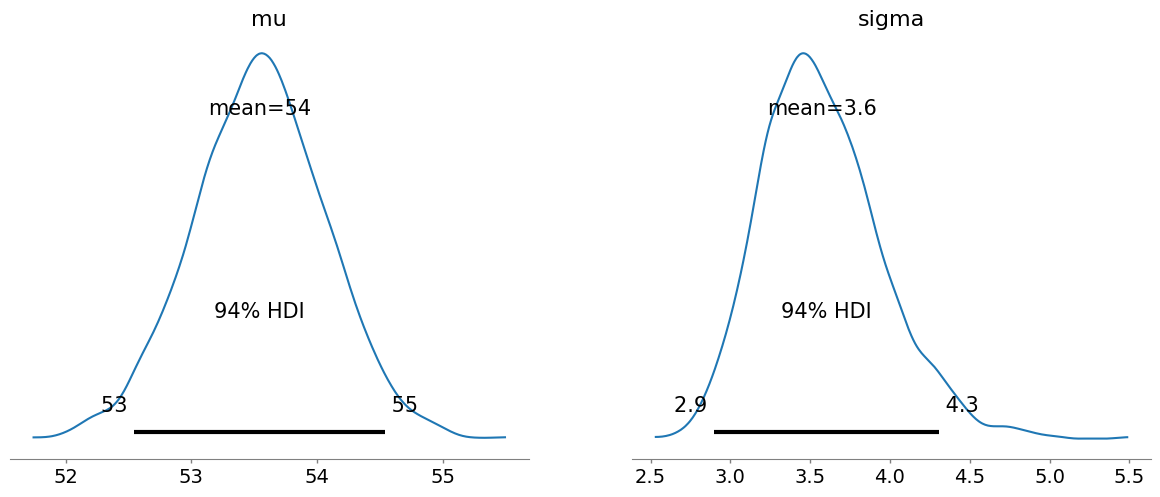

In [20]:
lower_mu = 40
upper_mu = 70

lower_sigma = 0
upper_sigma = 20

with pm.Model() as model_g:
    mu = pm.Uniform('mu', lower=lower_mu, upper=upper_mu)
    sigma = pm.Uniform('sigma', lower=lower_sigma, upper=upper_sigma)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=df) 
    trace_g = pm.sample(1000)

az.plot_posterior(trace_g)
az.summary(trace_g)